<h1> Projekt 1 Filip Adamiak </h1>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class ImageOperations():
    def __init__(self):
        pass

    def load_image(self, path: str) -> tuple[np.ndarray, str]:
        if not path:
            raise ValueError("No path specified!")
        
        input_image = cv.imread(path, cv.IMREAD_UNCHANGED)
        image_type = self.image_type(input_image)

        if(image_type == 'rgb'):
            input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
        
        return input_image, image_type

    def print_image(self, input_image:np.ndarray) -> None:
        if input_image is None:
            raise ValueError("No input image specified!")

        plt.imshow(input_image)

    def save_image(self, output_image: np.ndarray, image_name: str) -> None:
        if not image_name:
            raise ValueError("No path specified!")

        if output_image is None:
            raise ValueError("No output image specified!")
        
        cv.imwrite(image_name, output_image)
    
    def image_type(self, input_image: np.ndarray) -> str:
        try:
            height, width, channels = input_image.shape
        except ValueError:
            height, width = input_image.shape
            channels = None
        if channels:
            return 'rgb'
        
        for x in range(height):
            for y in range(width):
                if input_image[x, y].all() != 0 and input_image[x, y].all() != 255:
                    return 'mono'

        return 'binary'
        

In [3]:
class ConvertImageType():
    def __init__(self):
        pass

    def rgb2hsv(self, rgb: np.ndarray, image_type: str) -> tuple[np.ndarray, str]:
        """ convert RGB to HSV color space"""
        if image_type != 'rgb':
            raise ValueError("Wrong image type!")

        rgb = rgb.astype('float')
        maxv = np.amax(rgb, axis=2)
        maxc = np.argmax(rgb, axis=2)
        minv = np.amin(rgb, axis=2)
        minc = np.argmin(rgb, axis=2)

        hsv = np.zeros(rgb.shape, dtype='float')
        hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
        hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
        hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
        hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]

        hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
        hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
        hsv[..., 2] = maxv
        
        return hsv.astype(np.uint8), 'hsv'


    def hsv2rgb(self, hsv: np.ndarray, image_type: str) -> tuple[np.ndarray, str]:
        """ convert HSV to RGB color space """
        if image_type != 'hsv':
            raise ValueError("Wrong image type!")

        rgb = np.zeros(hsv.shape)

        hi = np.floor(hsv[..., 0] / 60.0) % 6
        hi = hi.astype('uint8')
        v = hsv[..., 2].astype('float')
        f = (hsv[..., 0] / 60.0) - np.floor(hsv[..., 0] / 60.0)
        p = v * (1.0 - hsv[..., 1])
        q = v * (1.0 - (f * hsv[..., 1]))
        t = v * (1.0 - ((1.0 - f) * hsv[..., 1]))

        rgb[hi == 0, :] = np.dstack((v, t, p))[hi == 0, :]
        rgb[hi == 1, :] = np.dstack((q, v, p))[hi == 1, :]
        rgb[hi == 2, :] = np.dstack((p, v, t))[hi == 2, :]
        rgb[hi == 3, :] = np.dstack((p, q, v))[hi == 3, :]
        rgb[hi == 4, :] = np.dstack((t, p, v))[hi == 4, :]
        rgb[hi == 5, :] = np.dstack((v, p, q))[hi == 5, :]

        return rgb.astype(np.uint8), 'rgb'

    def rgb2cmy(self, rgb: np.ndarray, image_type: str) -> tuple[np.ndarray, str]:
        """ convert RGB to CMY color space """
        if image_type != 'rgb':
            raise ValueError("Wrong image type!")

        cmy = 255 - rgb
        return cmy.astype(np.uint8), 'cmy'

    def cmy2rgb(self, cmy: np.ndarray, image_type: str) -> tuple[np.ndarray, str]:
        """ convert CMY to RGB color space """
        if image_type != 'cmy':
            raise ValueError("Wrong image type!")

        rgb = 255 - cmy
        return rgb.astype(np.uint8), 'rgb'

    def rgb2ycbcr(self, rgb: np.ndarray, image_type: str) -> tuple[np.ndarray, str]:
        """ convert RGB to YCbCr color space """
        if image_type != 'rgb':
            raise ValueError("Wrong image type!")

        ycbcr = np.zeros_like(rgb)
        ycbcr[..., 0] = 16 + 65.738 * rgb[..., 0]/256 + 129.057 * rgb[..., 1]/256 + 25.064 * rgb[..., 2]/256
        ycbcr[..., 1] = 128 - 37.945 * rgb[..., 0]/256  - 74.494 * rgb[..., 1]/256 + 112.439 * rgb[..., 2]/256
        ycbcr[..., 2] = 128 + 112.439 * rgb[..., 0]/256 + 94.154 * rgb[..., 1]/256 + 18.285 * rgb[..., 2]/256

        return ycbcr.astype(np.uint8), 'ycbcr'

    def ycbcr2rgb(self, ycbcr: np.ndarray, image_type: str) -> tuple[np.ndarray, str]:
        """ convert RGB to YCbCr color space """
        if image_type != 'ycbcr':
            raise ValueError("Wrong image type!")

        y =  ycbcr[..., 0]
        Cb = ycbcr[..., 1] - 128
        Cr = ycbcr[..., 2] - 128

        rgb = np.zeros_like(ycbcr)
        rgb[..., 0] = y + 45 * Cr / 32
        rgb[..., 1] = y - (11 * Cb + 23 * Cr) / 32
        rgb[..., 0] = y + 113 * Cb / 64

        return rgb.astype(np.uint8), 'rgb'

<h1> 1. Konwersje kolorow. </h1>
<h2> 1.1 Obraz RGB </h2>

In [4]:
operations = ImageOperations()
converter = ConvertImageType()

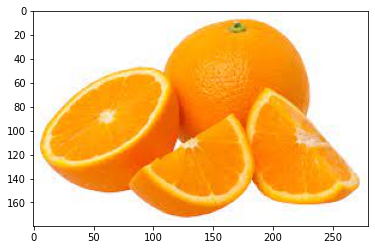

In [5]:
image, image_type = operations.load_image('oranges.jpeg')
plt.imshow(image)

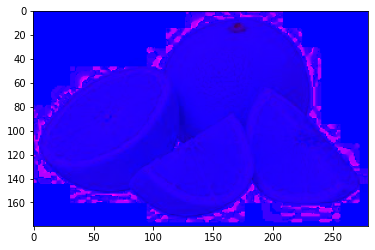

In [6]:
hsv_image, hsv_type = converter.rgb2hsv(image, image_type)
plt.imshow(hsv_image)

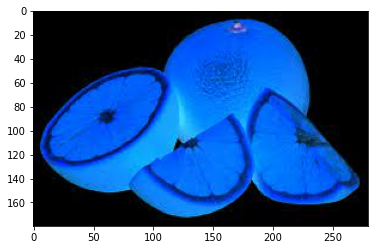

In [7]:
cmy2rgb, cmy2rgb_type = converter.rgb2cmy(image, image_type)
plt.imshow(cmy2rgb)

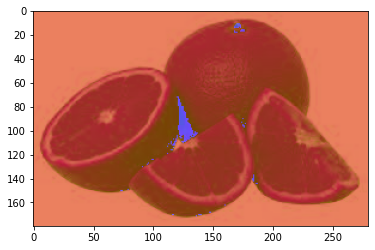

In [8]:
rgb2ycbcr, rgb2ycbcr_type = converter.rgb2ycbcr(image, image_type)
plt.imshow(rgb2ycbcr)

In [29]:
import math

class Filtrations():
    def __init__(self):
        pass

    def gaussian_mask(self, size: int, sigma: float) -> np.ndarray:
        m = n = size
        h, k = m//2, n//2
        x, y = np.mgrid[-h:h+1, -k:k+1]
        g = np.exp(-(x**2 + y**2)/(2*sigma**2))
        return g / g.sum()

    def convolution(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        if mask.shape[0] != mask.shape[1]:
            raise ValueError("Mask shape error!")

        res = np.zeros_like(img)

        for i in range(img.shape[0] - mask.shape[0] + 1):
            for j in range(img.shape[1] - mask.shape[0] + 1):
                if img.ndim == 3:
                    for channel in range(0, img.shape[2]):
                        w = img[i : i + mask.shape[0], j : j + mask.shape[0], channel]
                        conv = int(np.sum(w * mask) / np.sum(mask))

                        if conv > 255:
                            res[i][j][channel] = 255      
                        else:
                            res[i][j][channel] = conv
                else:            
                    w = img[i : i + mask.shape[0], j : j + mask.shape[0]]
                    conv = int(np.sum(w * mask) / np.sum(mask))

                    if conv > 255:
                        res[i][j] = 255 
                    else:
                        res[i][j] = conv

        return self.symmetrical_edges(res, mask.shape[0], res.shape[0], res.shape[1])
    
    def symmetrical_edges(self, img: np.ndarray, edge_pixels: int, last_row: int, last_column: int) -> np.ndarray:
        res = img.copy()
        for i in range(edge_pixels):
            res[last_row - edge_pixels + i, :] = res[last_row - edge_pixels - i - 1, :]
            res[:, last_column - edge_pixels + i] = res[:, last_column - edge_pixels -i - 1]

        return res

    def imclose(self, img: np.ndarray, length: int, angle: int, type = str) -> np.ndarray:
        SE = self.linear_se(length, angle)

        if type == 'mono':
            return self.mono_imerode(self.mono_imdilate(img, SE), SE)
        elif type == 'logic':
            return self.logic_imerode_2(self.logic_imdilate_2(img, SE), SE)
        else:
            raise ValueError("Unknown type")

    def linear_se(self, length: int, angle: int) -> np.ndarray:
        angle = math.radians(angle)

        nx = 2 * round(((length * abs(math.cos(angle))) - 1) / 2) + 1
        ny = 2 * round(((length * abs(math.sin(angle))) - 1) / 2) + 1

        res = np.zeros([ny, nx])

        if math.cos(angle) >= 0:
            points = self.bresenham_line(0, ny - 1, nx - 1, 0)

        else:
            points = self.bresenham_line(nx - 1, ny - 1, 0, 0)

        for x in points:
            res[x[1], x[0]] = 1
            
        return res
    
    def bresenham_line(self, x1: int, y1: int, x2: int, y2: int) -> list:
        """Bresenham's algorithm for line: https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm"""
        flag1 = False
        flag2 = False
        points = [] #output list

        step = 1

        dx = x2 - x1
        dy = y2 - y1
        
        if abs(dy) > abs(dx):
            flag1 = True
            x1, y1 = y1, x1
            x2, y2 = y2, x2

        if x1 > x2:
            flag2 = True
            x1, x2 = x2, x1
            y1, y2 = y2, y1
            
        dx = x2 - x1
        dy = y2 - y1

        if y1 > y2:
            step = -1

        error = int(dx / 2.0)

        y = y1
        
        for x in range(x1, x2 + 1):
            coord = (y, x) if flag1 else (x, y)
            points.append(coord)
            error -= abs(dy)

            if error < 0:
                y += step
                error += dx

        if flag2:
            points.reverse()

        return points

    def mono_imdilate(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        h, w = img.shape
        res = np.zeros_like(img)
        img_padding = np.pad(img, mask.shape[0] - 2, mode = 'constant')

        for i in range(h - mask.shape[0] + 1):
            for j in range(w - mask.shape[0] + 1):
                res[i][j] = np.max(img_padding[i : i + mask.shape[0], j: j + mask.shape[0]])

        return res

    def mono_imerode(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        h, w = img.shape
        res = np.zeros_like(img)
        img_padding = np.pad(img, mask.shape[0] - 2, mode = 'constant')

        for i in range(h - mask.shape[0] + 1):
            for j in range(w - mask.shape[0] + 1):
                res[i][j] = np.min(img_padding[i : i + mask.shape[0], j: j + mask.shape[0]])

        return res

    def logic_imdilate(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        h, w = img.shape
        res = np.zeros_like(img)
        img_padding = np.pad(img, mask.shape[0] - 2, mode = 'constant')

        for i in range(h - mask.shape[0] + 1):
            for j in range(w - mask.shape[0] + 1):
                res[i][j] = 1 if (img_padding[i : i + mask.shape[0], j : j + mask.shape[0]] == mask).any() else 0
        
        return res

    def logic_imerode(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        h, w = img.shape
        res = np.zeros_like(img)
        img_padding = np.pad(img, mask.shape[0] - 2, mode = 'constant')

        for i in range(h - mask.shape[0] + 1):
            for j in range(w - mask.shape[0] + 1):
                res[i][j] = 1 if (img_padding[i : i + mask.shape[0], j : j + mask.shape[0]] == mask).all() else 0

        return res

    def logic_imerode_2(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        width = img.shape[0]
        height = img.shape[1]

        mask_w = mask.shape[0]
        mask_h = mask.shape[1]

        half_mask_w = math.floor(mask_w / 2)
        half_mask_h = math.floor(mask_h / 2)

        res = np.zeros_like(img)
        
        for x in range(math.ceil(mask_w / 2), width - (mask_w // 2)):
            for y in range(math.ceil(mask_h / 2), height - half_mask_h):
                on = img[x - half_mask_w : x + half_mask_w + 1, y - half_mask_h : y + half_mask_h + 1]
                res[x, y] = min(on[ (mask == 1) ])
                
        return res

    def logic_imdilate_2(self, img: np.ndarray, mask: np.ndarray) -> np.ndarray:
        width = img.shape[0]
        height = img.shape[1]

        mask_w = mask.shape[0]
        mask_h = mask.shape[1]

        half_mask_w = math.floor(mask_w / 2)
        half_mask_h = math.floor(mask_h / 2)

        res = np.zeros_like(img)
        
        for x in range(math.ceil(mask_w / 2), width - (mask_w // 2)):
            for y in range(math.ceil(mask_h / 2), height - half_mask_h):
                on = img[x - half_mask_w : x + half_mask_w + 1, y - half_mask_h : y + half_mask_h + 1]
                res[x, y] = max(on[ (mask == 1) ])
                
        return res

    def binarize_image(self, img: np.ndarray, threshold: int) -> np.ndarray:
        return np.where(img >= threshold, True, False)

    def normalise_image(self, img: np.ndarray) -> np.ndarray:
        return img * (255.0 / img.max())

    def geodetic_distance_map(self, img: np.ndarray, SE: np.ndarray, x1: int, y1: int, x2: int, y2: int) -> tuple[np.ndarray, int]:
        img = self.binarize_image(img, 1)

        b = np.full(img.shape, False)
        b[x1, y1] = True
        n = 0

        while ~b[x2, y2]:
            b = self.logic_imdilate(b, SE) & img
            n += 1

        return self.normalise_image(b).astype(np.uint8), n
                

<h1> 2. Filtracja usredniajaca maska Gaussa o zadanej wielkosci i odchyleniu standardowym. Brzeg - odbicie symetryczne.
<h2> 2.1 Obraz RGB </h2>

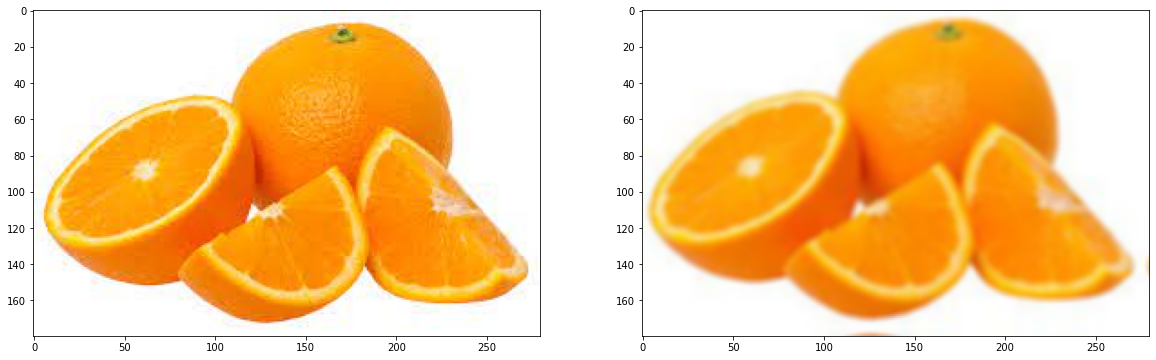

In [10]:
filtrations = Filtrations()

mask = filtrations.gaussian_mask(5, 2)
gauss_conv = filtrations.convolution(image, mask)

plt.subplots(1,2, figsize = (20, 10))
plt.subplot(121).imshow(image)
plt.subplot(122).imshow(gauss_conv)

<h2> 2.2 Obraz mono </h2>

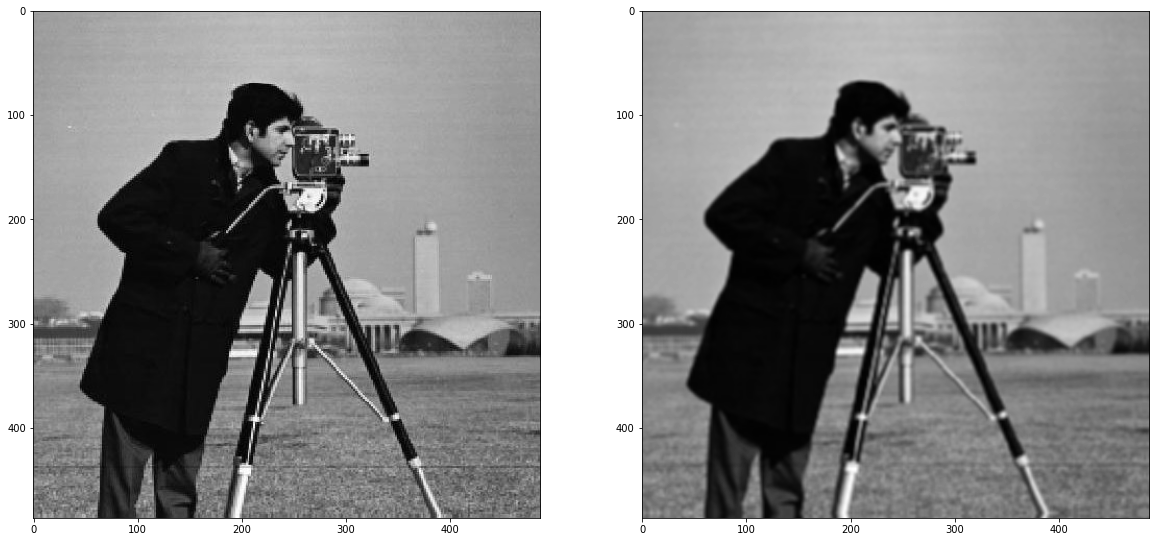

In [37]:
image_mono, image_mono_type = operations.load_image("cameraman.jpg")

gauss_conv = filtrations.convolution(image_mono, mask)

plt.subplots(1,2, figsize = (20, 10))
plt.subplot(121).imshow(image_mono, cmap = "gray")
plt.subplot(122).imshow(gauss_conv, cmap = "gray")

<h1> 3. Zamkniecie elementem linijnym o zadanej dlugosci i nachyleniu. </h1>
<h2> 3.1 Obraz mono </h2>

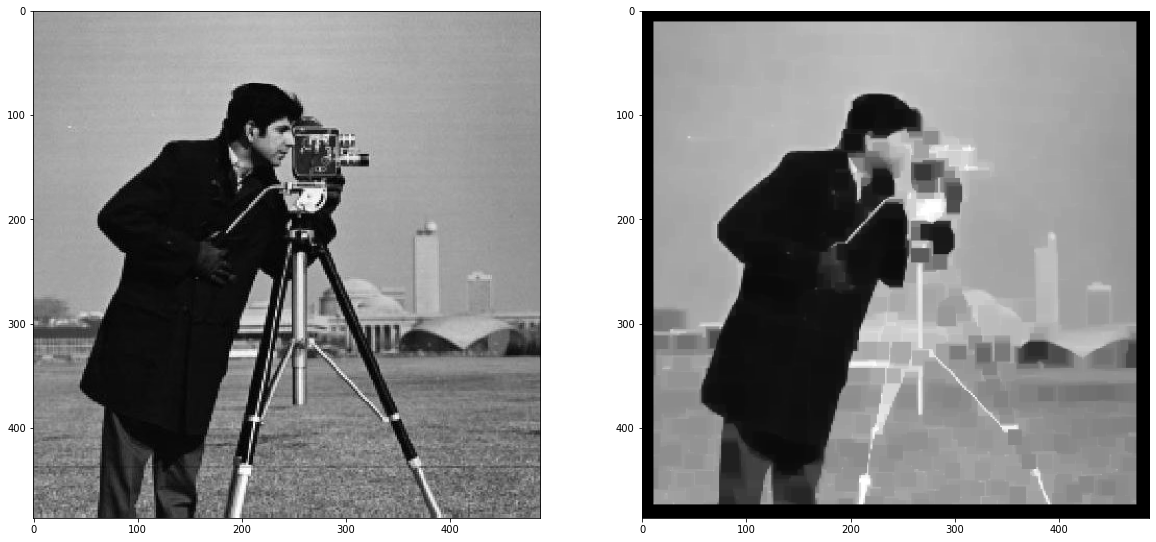

In [39]:
imclose_mono = filtrations.imclose(image_mono, 20, 40, image_mono_type)

plt.subplots(1,2, figsize = (20, 10))
plt.subplot(121).imshow(image_mono, cmap = "gray")
plt.subplot(122).imshow(imclose_mono, cmap = "gray")

<h2> 3.2 Obraz logiczny </h2>

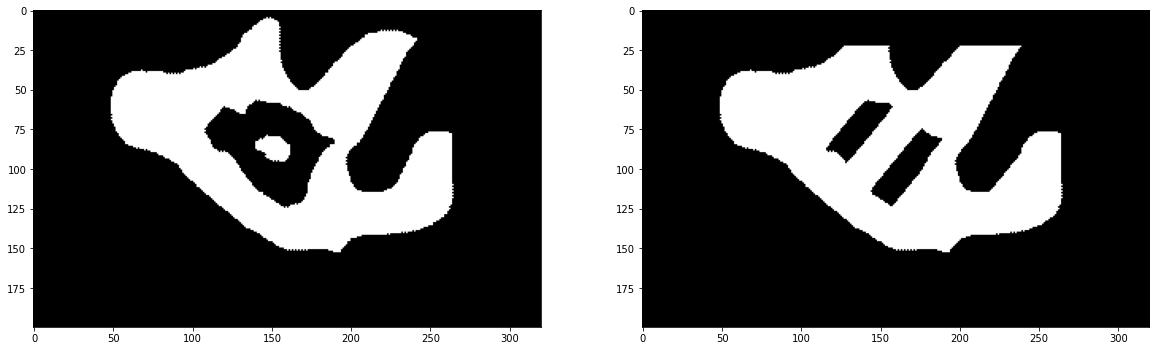

In [30]:
filtrations = Filtrations()
image_mono, image_mono_type = operations.load_image("dziury.bmp")
image_logical = filtrations.binarize_image(image_mono, 128)
image_logical_type = 'logic'

imclose_logical = filtrations.imclose(image_logical, 30, 50, image_logical_type)

plt.subplots(1,2, figsize = (20, 10))
plt.subplot(121).imshow(image_logical, cmap = "gray")
plt.subplot(122).imshow(imclose_logical, cmap = "gray")

<h1> 4. Mapa odleglosci geodezyjnej </h1>

In [31]:
b, n = filtrations.geodetic_distance_map(image_mono, np.ones(3), 20, 231, 84, 259)

In [32]:
n

149

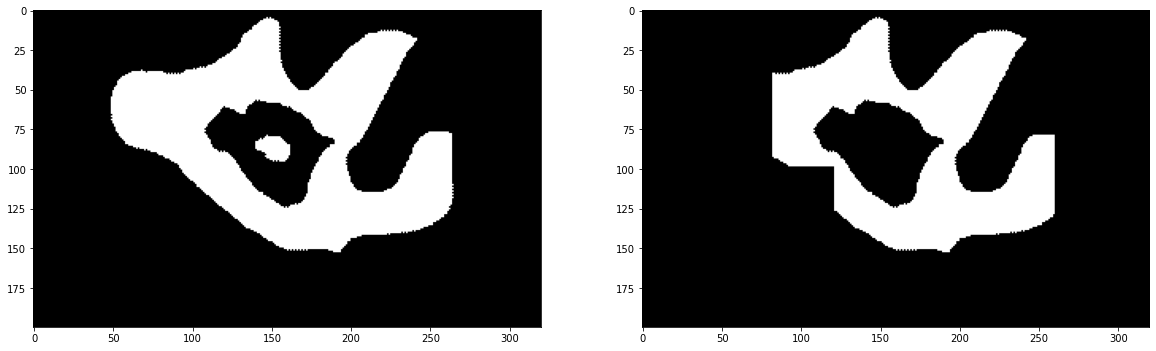

In [35]:
plt.subplots(1,2, figsize = (20, 10))
plt.subplot(121).imshow(image_logical, cmap = "gray")
plt.subplot(122).imshow(b, cmap = "gray")